# PyMongo Query

db = "test"
collection = "benchmarklogs"

In [1]:
from pymongo import MongoClient
client = MongoClient()

In [2]:
db = client['test']
collection = db['benchmarklogs']

In [3]:
import pprint

#pprint.pprint(collection.find_one())
for item in collection.find():
    pprint.pprint(item)


{'__v': 0,
 '_id': ObjectId('5bc720ee7d339d27d7b277c7'),
 'approach': 3,
 'averageDelay': 8.612334000000008,
 'benchmarkID': 0,
 'clique': False,
 'clique_period': 0,
 'difficulty': 503828,
 'difficulty_genesis_dec': 524288,
 'difficulty_genesis_hex': '0x80000',
 'ethash': True,
 'gasLimit': 4713124,
 'gasLimit_genesis_dec': 4700000,
 'gasLimit_genesis_hex': '0x47b760',
 'hashRate': 143568,
 'instanceType': 'c5.xlarge',
 'ip': '18.184.180.17',
 'maxRuntime': 600000,
 'maxRuntimeReached': False,
 'maxTransactions': 1000,
 'maxTransactionsReached': True,
 'miners': 1,
 'mining': True,
 'nodes': 1,
 'peerCount': 0,
 'runtime': 17.303,
 'scenario': 'account',
 'startTime': datetime.datetime(2018, 10, 17, 11, 45, 33, 220000),
 'successfulTransactions': 1000,
 'targetGasLimit': 4700000,
 'txPerSecond': 57.79344622319829,
 'usedGenesisJson': 'genesis_pow_default.json'}
{'__v': 0,
 '_id': ObjectId('5bc721137d339d27d7b277c8'),
 'approach': 3,
 'averageDelay': 9.826377000000004,
 'benchmarkID': 

 'mining': True,
 'nodes': 1,
 'peerCount': 0,
 'runtime': 49.811,
 'scenario': 'account',
 'startTime': datetime.datetime(2018, 10, 17, 12, 44, 29, 769000),
 'successfulTransactions': 3000,
 'targetGasLimit': 4700000,
 'txPerSecond': 60.2276605569051,
 'usedGenesisJson': 'genesis_pow_default.json'}
{'__v': 0,
 '_id': ObjectId('5bc72f300b695e2ab63a8fe1'),
 'approach': 3,
 'averageDelay': 24.370522999999988,
 'benchmarkID': 24,
 'clique': False,
 'clique_period': 0,
 'difficulty': 534944,
 'difficulty_genesis_dec': 524288,
 'difficulty_genesis_hex': '0x80000',
 'ethash': True,
 'gasLimit': 4743917,
 'gasLimit_genesis_dec': 4700000,
 'gasLimit_genesis_hex': '0x47b760',
 'hashRate': 159600,
 'instanceType': 'c5.xlarge',
 'ip': '18.184.180.17',
 'maxRuntime': 600000,
 'maxRuntimeReached': False,
 'maxTransactions': 3000,
 'maxTransactionsReached': True,
 'miners': 1,
 'mining': True,
 'nodes': 1,
 'peerCount': 0,
 'runtime': 51.673,
 'scenario': 'account',
 'startTime': datetime.datetime(2

 'peerCount': 0,
 'runtime': 104.335,
 'scenario': 'account',
 'startTime': datetime.datetime(2018, 10, 17, 13, 17, 3, 948000),
 'successfulTransactions': 1878,
 'targetGasLimit': 4700000,
 'txPerSecond': 17.999712464657115,
 'usedGenesisJson': 'genesis_pow_default.json'}
{'__v': 0,
 '_id': ObjectId('5bc737580b695e2ab63a8ff3'),
 'approach': 3,
 'averageDelay': 50.48896963696376,
 'benchmarkID': 42,
 'clique': False,
 'clique_period': 0,
 'difficulty': 517259,
 'difficulty_genesis_dec': 524288,
 'difficulty_genesis_hex': '0x80000',
 'ethash': True,
 'gasLimit': 4820637,
 'gasLimit_genesis_dec': 4700000,
 'gasLimit_genesis_hex': '0x47b760',
 'hashRate': 167649,
 'instanceType': 'c5.xlarge',
 'ip': '18.184.180.17',
 'maxRuntime': 600000,
 'maxRuntimeReached': False,
 'maxTransactions': 5000,
 'maxTransactionsReached': True,
 'miners': 1,
 'mining': True,
 'nodes': 1,
 'peerCount': 0,
 'runtime': 136.357,
 'scenario': 'account',
 'startTime': datetime.datetime(2018, 10, 17, 13, 19, 11, 942

# PyMongo Query ->Pandas DataFrame

In [4]:
import pandas as pd

query={"$and":[ {"$or":[ {"maxTransactions":1000}, {"maxTransactions":2000},{"maxTransactions":3000},{"maxTransactions":4000},{"maxTransactions":5000}]}
, {"usedGenesisJson":'genesis_pow_default.json'}, {"instanceType":'c5.xlarge'}]}

# Make a query to the specific DB and Collection
cursor = collection.find(query)

# Expand the cursor and construct the DataFrame
df =  pd.DataFrame(list(cursor))

#df.head(20)

data = df[['txPerSecond','maxTransactions']]
txPerSecond = df['txPerSecond']
maxTransactions =df['maxTransactions']
print(data)

    txPerSecond  maxTransactions
0     57.793446             1000
1     45.177321             1000
2     37.708813             1000
3     60.679612             1000
4     46.999107             1000
5     49.135220             1000
6     47.023418             1000
7     76.881679             1000
8     88.857295             1000
9     44.859142             1000
10    49.003994             2000
11    27.912300             2000
12    38.343558             2000
13    61.334642             2000
14    53.029299             2000
15    53.309167             2000
16    59.049306             2000
17    62.640942             2000
18    77.921066             2000
19    60.130483             2000
20    53.552303             3000
21    42.040948             3000
22    60.227661             3000
23    58.057399             3000
24    48.323185             3000
25    32.395309             3000
26    49.185166             3000
27    32.408608             3000
28    64.915394             3000
29    41.1

# Pandas DataFrame -> Plot

In [5]:
import matplotlib.pyplot as plt

title="Effect of Workload Size on Throughput"
xlabel="Workload Size (Transactions)"
ylabel="Transactions Per Second (TPS)"


plt.scatter(maxTransactions,txPerSecond)
plt.title(title)
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.savefig("workload_size_throughput_scatter.svg", format="svg")
plt.show()

<Figure size 640x480 with 1 Axes>

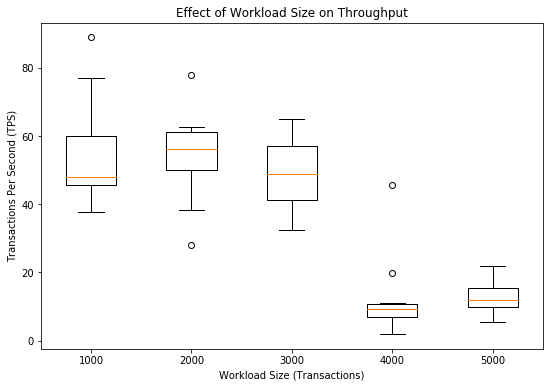

In [6]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Create the boxplot

## combine these different collections into a list    
data_to_plot = [data.loc[df['maxTransactions'] == 1000].iloc[:,0],
                data.loc[df['maxTransactions'] == 2000].iloc[:,0],
                data.loc[df['maxTransactions'] == 3000].iloc[:,0],
                data.loc[df['maxTransactions'] == 4000].iloc[:,0],
                data.loc[df['maxTransactions'] == 5000].iloc[:,0]]

bp = ax.boxplot(data_to_plot,labels=list(["1000","2000","3000","4000","5000"]))
fig.savefig("workload_size_throughput_boxplot.svg", format="svg")



55.51150527857961
54.26747560659389
48.22435638433684
12.63933114826728
12.734314583225046


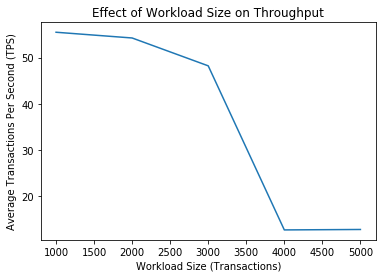

In [7]:
avg1000=data.loc[df['maxTransactions'] == 1000].iloc[:,0].mean()
avg2000=data.loc[df['maxTransactions'] == 2000].iloc[:,0].mean()
avg3000=data.loc[df['maxTransactions'] == 3000].iloc[:,0].mean()
avg4000=data.loc[df['maxTransactions'] == 4000].iloc[:,0].mean()
avg5000=data.loc[df['maxTransactions'] == 5000].iloc[:,0].mean()

print(avg1000)
print(avg2000)
print(avg3000)
print(avg4000)
print(avg5000)

plt.plot([1000,2000,3000,4000,5000],[avg1000,avg2000,avg3000,avg4000,avg5000])
plt.title(title)
plt.ylabel("Average Transactions Per Second (TPS)")
plt.xlabel(xlabel)
plt.savefig("workload_size_throughput_lines_average.svg", format="svg")
plt.show()